In [1]:
import os
from osgeo import gdal

import pickle
import numpy as np
import pandas as pd
import geopandas as gpd
import pyvista as pv

from geoh5py.workspace import Workspace
from geoh5py.objects import Points
from geoh5py.objects import Surface
from scipy.spatial import Delaunay

import xarray as xr
import rioxarray


C:\Users\rscott\AppData\Roaming\Python\Python38\site-packages\h5py\__init__.py:37: UserWarning: h5py is running against HDF5 1.10.6 when it was built against 1.10.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


Load geoh5 project created with geosoft grid loaded into Geoscience Analyst

In [2]:
ws = Workspace(r"F:\Canada\canadagravity.geoh5")

Find the grid information

In [3]:
ws.list_entities_name

{UUID('6df1e55b-073d-4c37-a2cd-6c5a926b6e30'): 'Workspace',
 UUID('e199f6f6-c5c9-4f8f-92bd-fa97c62676d9'): 'Geosoft imports',
 UUID('b862ec5c-8e22-4af0-9900-5011aa869f02'): 'Canada 2 km - GRAV - 1st Vertical Derivative - Dérivée 1ère verticale',
 UUID('0dfc874b-3fae-400e-9a4a-c0904c8bb8dd'): 'Visual Parameters',
 UUID('7b9ebc30-3922-4e41-be3b-f442a5fd4cbf'): 'Canada 2 km - GRAV - 1st Vertical Derivative - Dérivée 1ère verticale'}

Get the coordinates

In [4]:
unit = ws.get_entity('Canada 2 km - GRAV - 1st Vertical Derivative - Dérivée 1ère verticale')[0]
unit

In [7]:
unit.centroids

array([[-2936000., -1418000.,        0.],
       [-2934000., -1418000.,        0.],
       [-2932000., -1418000.,        0.],
       ...,
       [ 5926000.,  4660000.,        0.],
       [ 5928000.,  4660000.,        0.],
       [ 5930000.,  4660000.,        0.]])

In [8]:
unit.shape

(4434, 3040)

Get the data

In [13]:
mylist = unit.get_data_list()
print(mylist, unit.get_data(mylist[0]))

['Canada 2 km - GRAV - 1st Vertical Derivative - Dérivée 1ère verticale', 'Visual Parameters'] [<geoh5py.data.float_data.FloatData object at 0x000002AE37852130>]


In [16]:
funit = unit.get_data(mylist[0])
funit

In [30]:
funit[0].values[0:1000]

array([1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
       1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
       1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
       1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
       1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
       1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
       1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
       1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
       1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
       1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
       1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
       1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
       1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
       1.17549435e-38, 1.17549435e-38, 1.17549435e-38, 1.17549435e-38,
      

In [22]:
funit[0].values.shape

(13479360,)

In [23]:
unit.centroids[:,0]

array([-2936000., -2934000., -2932000., ...,  5926000.,  5928000.,
        5930000.])

Convert to raster by utilising the highly convenient high level rioxarray api

In [24]:
df=pd.DataFrame()
df['x'] = unit.centroids[:,0]
df['y'] = unit.centroids[:,1]
df['data'] = funit[0].values

In [25]:
df = df.sort_values(by=['y','x'])

In [27]:
def df_to_xarray(df):
    data = np.asarray(df.data).reshape(df.y.unique().size,df.x.unique().size)
    da = xr.DataArray(data=data,dims=["y","x"],coords={"y":df.y.unique(),"x":df.x.unique()})
    return da

In [28]:
da = df_to_xarray(df)

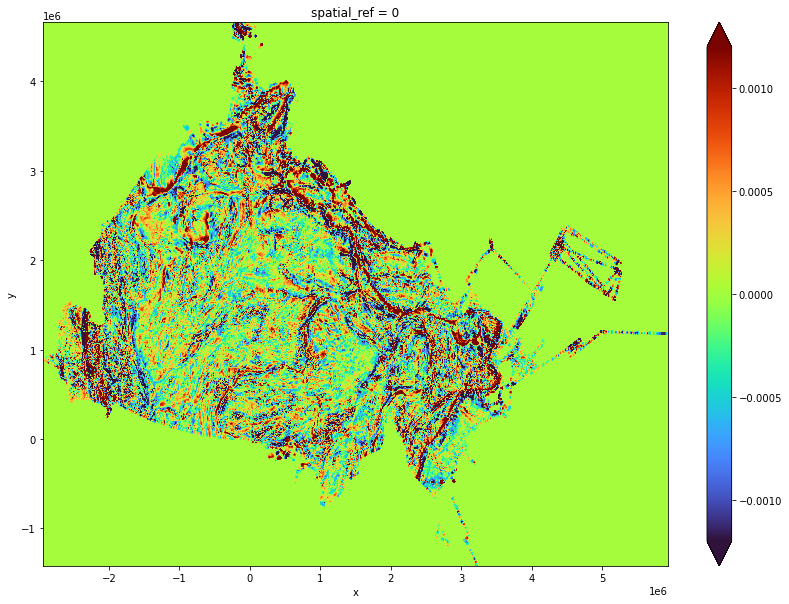

In [37]:
da.plot(robust=True,cmap="turbo",figsize=(14,10))

Add CRS so that it is georeferenced correctly

In [32]:
da = da.rio.write_crs('EPSG:3978')
da.rio.crs

CRS.from_epsg(3978)

In [34]:
da.rio.to_raster(r'F:\Canada\Geophysics\Canada 2 km - GRAV - Gravity Anomalies - Anomalies gravimétriques - DATA.tif')